# Multiple Output Models using the Keras Functional API

## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

## Load Dataset

In [2]:
# URL of the white wine dataset
URI = './winequality-white.csv'

# load the dataset from the URL
white_df = pd.read_csv(URI, sep=";")

# fill the `is_red` column with zeros.
white_df["is_red"] = 0

# keep only the first of duplicate items
white_df = white_df.drop_duplicates(keep='first')


In [3]:
# You can click `File -> Open` in the menu above and open the `utils.py` file 
# in case you want to inspect the unit tests being used for each graded function.

utils.test_white_df(white_df)


 All public tests passed


In [3]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

8.8
9.1


### Pre-process the red wine dataset (TODO)
- In the red wine dataset, you will fill in the column `is_red` with ones (1).

In [4]:
# URL of the red wine dataset
URI = './winequality-red.csv'

# load the dataset from the URL
red_df = pd.read_csv(URI, sep=";")

# fill the `is_red` column with ones.
red_df["is_red"] = 1

# keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')


In [6]:
utils.test_red_df(red_df)


 All public tests passed


In [5]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])

9.4
10.2


### Concatenate the datasets

Next, concatenate the red and white wine dataframes.

In [6]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [7]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
9.5


This will chart the quality of the wines.

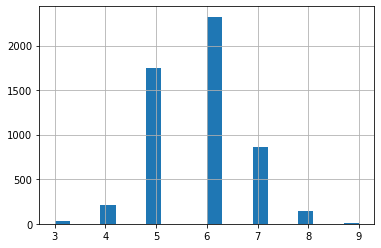

In [8]:
df['quality'].hist(bins=20);

### Imbalanced data (TODO)
You can see from the plot above that the wine quality dataset is imbalanced. 
- Since there are very few observations with quality equal to 3, 4, 8 and 9, you can drop these observations from your dataset. 
- You can do this by removing data belonging to all classes except those > 4 and < 8.

In [9]:
# get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8)]

# reset index and drop the old one
df = df.reset_index(drop=True)

In [12]:
utils.test_df_drop(df)



 All public tests passed


In [10]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
10.9


You can plot again to see the new range of data and quality

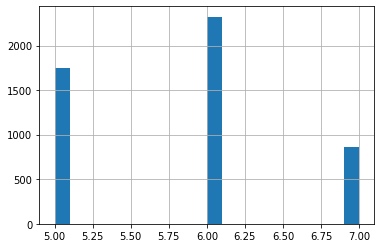

In [11]:
df['quality'].hist(bins=20);

### Train Test Split (TODO)

In [12]:
# split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=0.2, random_state = 1)
                               
# split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [16]:
utils.test_data_sizes(train.size, test.size, val.size)



 All public tests passed


Here's where you can explore the training stats. You can pop the labels 'is_red' and 'quality' from the data as these will be used as the labels


In [13]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

Explore the training stats!

In [14]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


### Get the labels

In [15]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [16]:
# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)
    
# format the output of the test set
test_Y = format_output(test)

In [21]:
utils.test_format_output(df, train_Y, val_Y, test_Y)

 All public tests passed


In [17]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


### Normalize the data

In [18]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [19]:
# normalize the train set
norm_train_X = norm(train)
    
# normalize the val set
norm_val_X = norm(val)
    
# normalize the test set
norm_test_X = norm(test)

In [25]:
utils.test_norm(norm_train_X, norm_val_X, norm_test_X, train, val, test)


 All public tests passed


## Define the Model

In [22]:
def base_model(inputs):
    
    # connect a Dense layer with 128 neurons and a relu activation
    x = tf.keras.layers.Dense(units = 512, activation = 'relu')(inputs)
    
    # connect another Dense layer with 128 neurons and a relu activation
    x = tf.keras.layers.Dense(units = 512, activation = 'relu')(x)
    return x 

In [27]:
utils.test_base_model(base_model)

 All public tests passed


# Define output layers of the model
We will add output layers to the base model. 
- The model will need two outputs.

One output layer will predict wine quality, which is a numeric value.
- Define a `Dense` layer with 1 neuron.
- Since this is a regression output, the activation can be left as its default value `None`.

The other output layer will predict the wine type, which is either red `1` or not red `0` (white).
- Define a `Dense` layer with 1 neuron.
- Since there are two possible categories, you can use a sigmoid activation for binary classification.

In [23]:
def final_model(inputs):
    
    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for regression
    wine_quality = Dense(units='1', name='wine_quality')(x)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wine_type = Dense(units='1', activation= 'sigmoid', name='wine_type')(x)

    # define the model using the input and output layers
    model = Model(inputs= inputs, outputs = [wine_quality, wine_type])

    return model

In [29]:
utils.test_final_model(final_model)

 All public tests passed


## Compiling the Model

To set more than one loss, use a dictionary of key-value pairs.
- You can look at the docs for the losses [here](https://www.tensorflow.org/api_docs/python/tf/keras/losses#functions).
    - **Note**: For the desired spelling, please look at the "Functions" section of the documentation and not the "classes" section on that same page.
- wine_type: Since you will be performing binary classification on wine type, you should use the binary crossentropy loss function for it.  Please pass this in as a string.  
  - **Hint**, this should be all lowercase.  In the documentation, you'll see this under the "Functions" section, not the "Classes" section.
- wine_quality: since this is a regression output, use the mean squared error.  Please pass it in as a string, all lowercase.
  - **Hint**: You may notice that there are two aliases for mean squared error.  Please use the shorter name.


You will also set the metric for each of the two outputs.  Again, to set metrics for two or more outputs, use a dictionary with key value pairs.
- The metrics documentation is linked [here](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).
- For the wine type, please set it to accuracy as a string, all lowercase.
- For wine quality, please use the root mean squared error.  Instead of a string, you'll set it to an instance of the class [RootMeanSquaredError](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError), which belongs to the tf.keras.metrics module.

**Note**: If you see the error message 
>Exception: wine quality loss function is incorrect.

- Please also check your other losses and metrics, as the error may be caused by the other three key-value pairs and not the wine quality loss.

In [26]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms, 
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mse'
                     },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality': tf.keras.metrics.RootMeanSquaredError(), 
                       }
             )

In [31]:
utils.test_model_compile(model)

 All public tests passed


## Training the Model

Fit the model to the training inputs and outputs. 
- Check the documentation for [model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit).
- Remember to use the normalized training set as inputs. 
- For the validation data, please use the normalized validation set.

In [28]:
history = model.fit(norm_train_X, train_Y, 
                    epochs = 200, validation_data=(norm_val_X, val_Y), verbose=0)


In [29]:
utils.test_history(history)

NameError: name 'utils' is not defined

In [30]:
# Gather the training metrics
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

25/25 [==============================] - 0s 1ms/step - loss: 0.4040 - wine_quality_loss: 0.3660 - wine_type_loss: 0.0380 - wine_quality_root_mean_squared_error: 0.6050 - wine_type_accuracy: 0.9937

loss: 0.40400588512420654
wine_quality_loss: 0.3660128712654114
wine_type_loss: 0.03799309581518173
wine_quality_rmse: 0.6049900054931641
wine_type_accuracy: 0.9936628937721252


## Analyze the Model Performance

Note that the model has two outputs. The output at index 0 is quality and index 1 is wine type

So, round the quality predictions to the nearest integer.

In [31]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

In [32]:
print(quality_pred[0])

[5.787343]


In [33]:
print(type_pred[0])
print(type_pred[944])

[1.6073521e-08]
[1.]


### Plot Utilities

We define a few utilities to visualize the model performance.

In [34]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


In [35]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

In [36]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

### Plots for Metrics

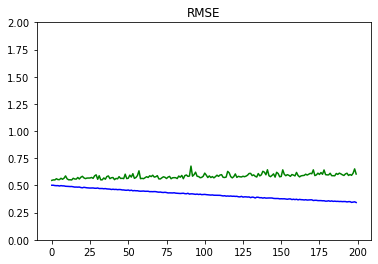

In [37]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

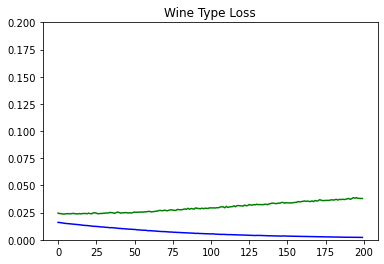

In [38]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

### Plots for Confusion Matrix

Plot the confusion matrices for wine type. You can see that the model performs well for prediction of wine type from the confusion matrix and the loss metrics.

<ipython-input-35-47bb6e202cb0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-35-47bb6e202cb0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


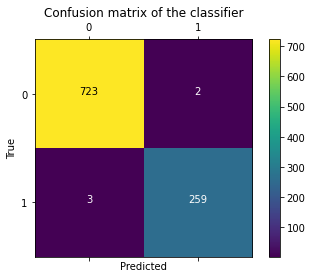

In [39]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

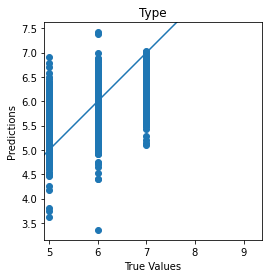

In [40]:
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')